In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# imgroot = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/img/'
imgroot = 'C:/Users/lezhi/Dropbox/thesis/img/'
dataroot = 'C:/Users/lezhi/Dropbox/thesis/data/'

# spectral clustering w/ image feature matrix (Image level)

In [8]:
df = pd.read_csv(dataroot+'deep_features_boston.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,2.0897,0,0,0,0,0.54691,0,0,0.00000,1.338,...,0.47297,0.0000,0,0,0.0000,0.0000,0,0,0.000000,0
1,0.0000,0,0,0,0,0.00000,0,0,0.00000,0.000,...,0.22579,0.0000,0,0,0.0000,0.0000,0,0,0.000000,0
2,1.1076,0,0,0,0,0.00000,0,0,0.97727,0.000,...,0.00000,0.0000,0,0,0.0000,0.0000,0,0,0.000000,0
3,0.0000,0,0,0,0,0.00000,0,0,0.21260,0.000,...,1.05530,1.1426,0,0,2.9811,1.0855,0,0,0.001122,0
4,0.0000,0,0,0,0,0.00000,0,0,0.00000,0.000,...,0.49824,0.0000,0,0,0.0000,1.0555,0,0,0.000000,0


#### DBSCAN doesn't seem working

In [15]:
X = df
dbscan = DBSCAN(eps=0.8, min_samples=10, metric='euclidean')
dbscan.fit_predict(X)
#print(pca.explained_variance_ratio_) 
#print(dbscan.components_)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [14]:
print(dbscan.labels_)

(5638L,)


#### Spectural Clustering seems to work

In [27]:
num_cat = 2
spectral = cluster.SpectralClustering(n_clusters=num_cat,
                                      eigen_solver='arpack',
                                      affinity="rbf")
y_pred = spectral.fit_predict(X)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [37]:
y_preds = pd.DataFrame()
for num_cat in range(2,21):
    print num_cat
    spectral = cluster.SpectralClustering(n_clusters=num_cat,
                                      eigen_solver='arpack',
                                      affinity="rbf")
    y_pred = spectral.fit_predict(X)
    y_preds['cat_from_'+str(num_cat)] = y_pred

In [38]:
y_preds.head()

,cat_from_2,cat_from_3,cat_from_4,cat_from_5,cat_from_6,cat_from_7,cat_from_8,cat_from_9,cat_from_10,cat_from_11,cat_from_12,cat_from_13,cat_from_14,cat_from_15,cat_from_16,cat_from_17,cat_from_18,cat_from_19,cat_from_20
0,0,1,1,3,0,1,2,1,3,4,1,2,1,0,1,2,2,1,4
1,0,2,1,3,0,1,2,8,7,1,1,2,1,8,1,10,13,6,0
2,1,0,1,2,0,4,6,1,7,1,1,2,1,0,1,3,2,1,0
3,0,0,1,1,0,1,2,1,7,1,1,2,1,12,1,10,2,1,4
4,1,0,1,3,0,1,3,1,7,1,1,2,4,12,15,3,17,1,4


In [42]:
df_label = pd.read_csv(dataroot+'test_stats_boston.csv')
clusters_df = df_label.join(y_preds)
clusters_df.to_csv(dataroot+'clusters_boston.csv')

# spectral clustering w/ precomputed affinity matrix (class level)

In [2]:
cats_boston = ['Agassiz','Allston','Area 2/MIT','BROOKLINE_02445','BROOKLINE_02446','Back Bay',  
        'Bay Village','Beacon Hill','Brighton','Cambridgeport','Charlestown','Chinatown',
        'Dorchester','Downtown','EVERETT_02149','East Boston','East Cambridge','Fenway',
        'Jamaica Plain','Leather District','Longwood Medical Area','MEDFORD_02155','Mid-Cambridge',
        'Mission Hill','Neighborhood Nine','North Cambridge','North End','Riverside','Roxbury',
        'SOMERVILLE_02143','SOMERVILLE_02144','SOMERVILLE_02145','South Boston','South Boston Waterfront',
        'South End','The Port','WATERTOWN_02472','Wellington-Harrington','West Cambridge','West End']

In [16]:
confuse_df = pd.read_csv(dataroot+'confusion_directed_all.csv')

In [66]:
label_df = pd.read_csv(dataroot+'test_stats_all.csv')
label_df = label_df[['label','label_num']].drop_duplicates()
labels = label_df.sort(['label_num']).reset_index()['label']
labels

0                      boston_Agassiz
1                      boston_Allston
2                     boston_Area2MIT
3              boston_BROOKLINE_02445
4              boston_BROOKLINE_02446
5                      boston_BackBay
6                   boston_BayVillage
7                   boston_BeaconHill
8                     boston_Brighton
9                boston_Cambridgeport
10                 boston_Charlestown
11                   boston_Chinatown
12                  boston_Dorchester
13                    boston_Downtown
14               boston_EVERETT_02149
15                  boston_EastBoston
16               boston_EastCambridge
17                      boston_Fenway
18                boston_JamaicaPlain
19             boston_LeatherDistrict
20         boston_LongwoodMedicalArea
21               boston_MEDFORD_02155
22                boston_MidCambridge
23                 boston_MissionHill
24            boston_NeighborhoodNine
25              boston_NorthCambridge
26          

In [64]:
label.to_csv(dataroot+'neighborhoods_all.csv')

NameError: name 'label' is not defined

In [23]:
confuse_df.columns = labels

In [24]:
#confuse_df.columns = cats_boston
confuse_df.index = confuse_df.columns
confuse_df.head()

label,boston_Agassiz,boston_Allston,boston_Area2MIT,boston_BROOKLINE_02445,boston_BROOKLINE_02446,boston_BackBay,boston_BayVillage,boston_BeaconHill,boston_Brighton,boston_Cambridgeport,...,sanfrancisco_PacificHeights,sanfrancisco_Parkside,sanfrancisco_PotreroHill,sanfrancisco_PresidioHeights,sanfrancisco_RussianHill,sanfrancisco_Seacliff,sanfrancisco_SouthOfMarket,sanfrancisco_TwinPeaks,sanfrancisco_WestOfTwinPeaks,sanfrancisco_WesternAddition
label,,,,,,,,,,,,,,,,,,,,,
boston_Agassiz,0.000000,0.27492,1.18640,0.00000,0.80538,0.29958,0.00000,0.00000,0.18399,0.00000,...,0.00000,0,0.00000,0.000000,0,0,0.000000,0.00000,0.00000,0.00000
boston_Allston,0.003822,0.00000,0.00000,0.83948,0.24194,0.00000,0.00000,0.04361,0.26084,0.00000,...,0.00000,0,0.61225,0.000000,0,0,0.057937,0.24468,0.37144,0.00000
boston_Area2MIT,0.328260,0.86088,0.00000,0.10457,0.00000,0.96936,0.00000,0.00000,0.19028,0.17483,...,0.54077,0,0.00000,0.000000,0,0,0.000000,0.00000,0.13007,0.18902
boston_BROOKLINE_02445,1.541300,0.29580,0.62410,0.00000,1.97900,0.00000,0.00000,0.26144,0.72806,0.40572,...,0.00000,0,0.00000,0.004507,0,0,0.000000,0.00000,0.00000,0.00000
boston_BROOKLINE_02446,2.277600,0.79079,0.28199,1.12070,0.00000,0.87979,0.34719,0.22071,1.92040,0.10626,...,0.00000,0,0.00000,0.000000,0,0,0.542850,0.00000,0.00000,0.12937


In [25]:
confuse_matrix = np.matrix(confuse_df)
# make connectivity symmetric
confuse_matrix = 0.5 * (confuse_matrix + confuse_matrix.T)
confuse_matrix

matrix([[ 0.      ,  0.139371,  0.75733 , ...,  0.      ,  0.      ,  0.      ],
        [ 0.139371,  0.      ,  0.43044 , ...,  0.321975,  0.230013,  0.      ],
        [ 0.75733 ,  0.43044 ,  0.      , ...,  0.      ,  0.065035,
          0.09451 ],
        ..., 
        [ 0.      ,  0.321975,  0.      , ...,  0.      ,  0.85413 ,
          0.467955],
        [ 0.      ,  0.230013,  0.065035, ...,  0.85413 ,  0.      ,
          0.08243 ],
        [ 0.      ,  0.      ,  0.09451 , ...,  0.467955,  0.08243 ,  0.      ]])

### below is for javascript (node-link graph; cluster map)

In [26]:
link_lst = []
for i in range(len(confuse_df)):
    for j in range(i+1, len(confuse_df)):
        link_lst = link_lst + [(confuse_df.columns[i], confuse_df.columns[j], confuse_matrix[i,j])]
link_df = pd.DataFrame(link_lst, columns = ["source", 'target', 'weight'])
link_df.to_csv(dataroot+"link_all.csv")
link_df.head()

,source,target,weight
0,boston_Agassiz,boston_Allston,0.139371
1,boston_Agassiz,boston_Area2MIT,0.757330
2,boston_Agassiz,boston_BROOKLINE_02445,0.770650
3,boston_Agassiz,boston_BROOKLINE_02446,1.541490
4,boston_Agassiz,boston_BackBay,0.149790


In [27]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
for i in range(2,8):
    spectral = cluster.SpectralClustering(n_clusters=i,
                                          eigen_solver='arpack',
                                          affinity="precomputed")
    y_pred = spectral.fit_predict(confuse_matrix)
    confuse_df['cluster_outof_'+str(i)] = y_pred
confuse_df.to_csv(dataroot+'confusion_all.csv')

In [72]:
pd.DataFrame(confuse_df.index).to_csv(dataroot+'neighborhood_all.csv')

### below is for visualizing in ipynb

In [53]:
spectral = cluster.SpectralClustering(n_clusters=3,
                                      eigen_solver='arpack',
                                      affinity="precomputed")
# y_pred = spectral.fit_predict(conf_matrix)
# order = np.argsort(y_pred)
# reorderd_mtx = np.matrix(np.array(conf_matrix)[order][:,[order]])

In [54]:
# predict cluster memberships
y_pred = spectral.fit_predict(confuse_matrix)
y_pred

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [55]:
# confuse_df['cluster_outof_'+str(i)] = y_pred
# confuse_df.to_csv(dataroot+'confusion_boston.csv')

In [56]:
orderind = np.argsort(y_pred)

In [57]:
y_pred[orderind]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [60]:
# http://stackoverflow.com/questions/18547847/sort-rows-and-columns-of-a-matrix-by-another-list-with-numpy
reorderd_confuse_matrix = np.matrix(np.array(confuse_matrix)[orderind][:,[orderind]])
reorderd_cats = np.array(labels)[orderind]
reorderd_cats

array(['newyork_GarmentDistrict', 'sanfrancisco_Downtown',
       'newyork_Yorkville', 'sanfrancisco_FinancialDistrict',
       'newyork_WestVillage', 'newyork_UpperWestSide',
       'newyork_UpperEastSide', 'newyork_Tribeca', 'newyork_Soho',
       'newyork_NorthSuttonArea', 'chicago_Loop', 'boston_LeatherDistrict',
       'newyork_MurrayHill', 'newyork_Midtown', 'sanfrancisco_Chinatown',
       'chicago_NearNorthSide', 'newyork_LittleItaly',
       'newyork_EastVillage', 'newyork_EastHarlem', 'newyork_Clinton',
       'newyork_Chinatown', 'boston_BackBay', 'newyork_LowerEastSide',
       'newyork_Chelsea', 'newyork_CarnegieHill', 'newyork_BatteryPark',
       'newyork_Gramercy', 'boston_Chinatown', 'newyork_GreenwichVillage',
       'boston_Downtown', 'newyork_FinancialDistrict',
       'sanfrancisco_Bayview', 'sanfrancisco_WestOfTwinPeaks',
       'sanfrancisco_WesternAddition', 'sanfrancisco_DiamondHeights',
       'sanfrancisco_TwinPeaks', 'sanfrancisco_SouthOfMarket',
       'san

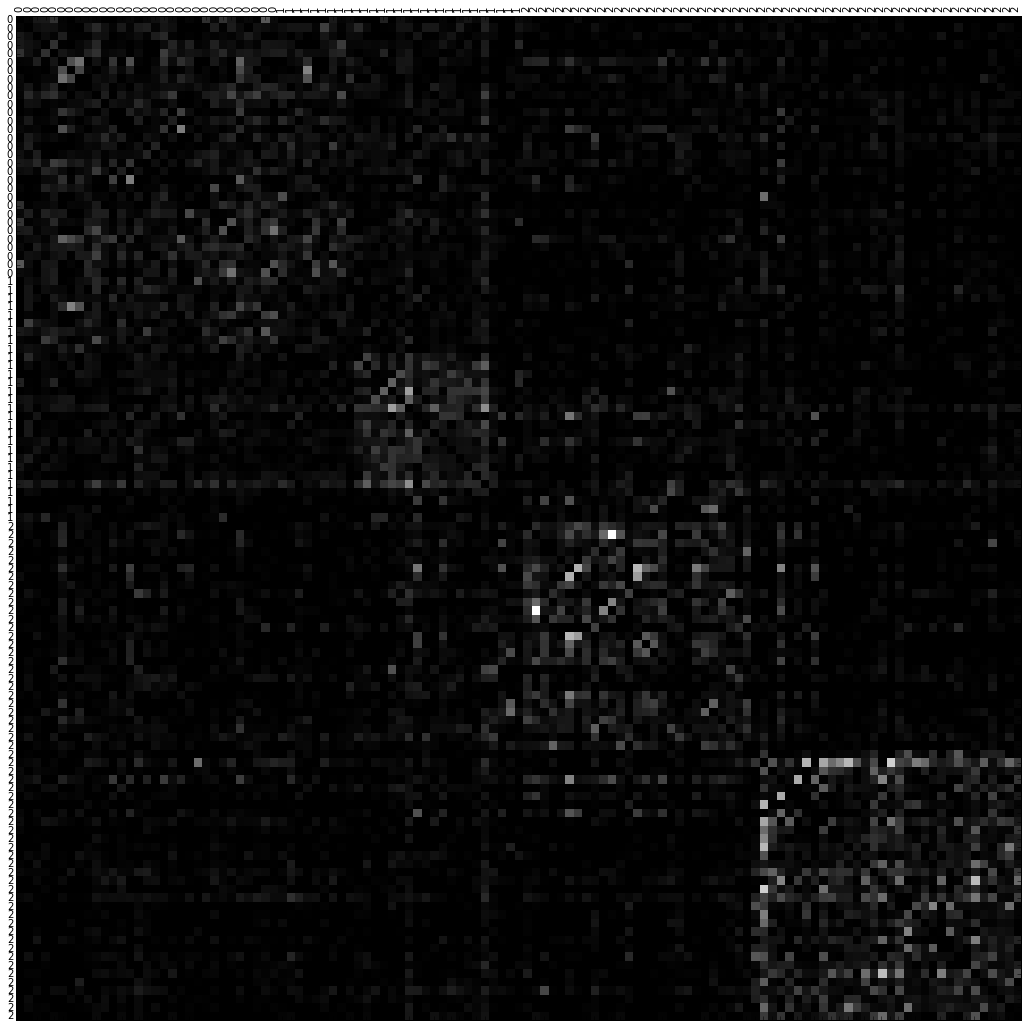

In [61]:
# http://stackoverflow.com/questions/24190858/matplotlib-move-ticklabels-between-ticks
# http://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib
fig = plt.figure(figsize=(18,18))

ax = fig.add_subplot(111)
im = ax.matshow(confuse_matrix, cmap='gray')
#fig.colorbar(im)

# Shift ticks to be at 0.5, 1.5, etc
#for axis in [ax.xaxis, ax.yaxis]:
ax.yaxis.set(ticks=np.arange(0, len(labels)), ticklabels = y_pred[orderind]) # labels)
ax.xaxis.set(ticks=np.arange(0, len(labels)), ticklabels = y_pred[orderind]) # labels)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)

plt.show()

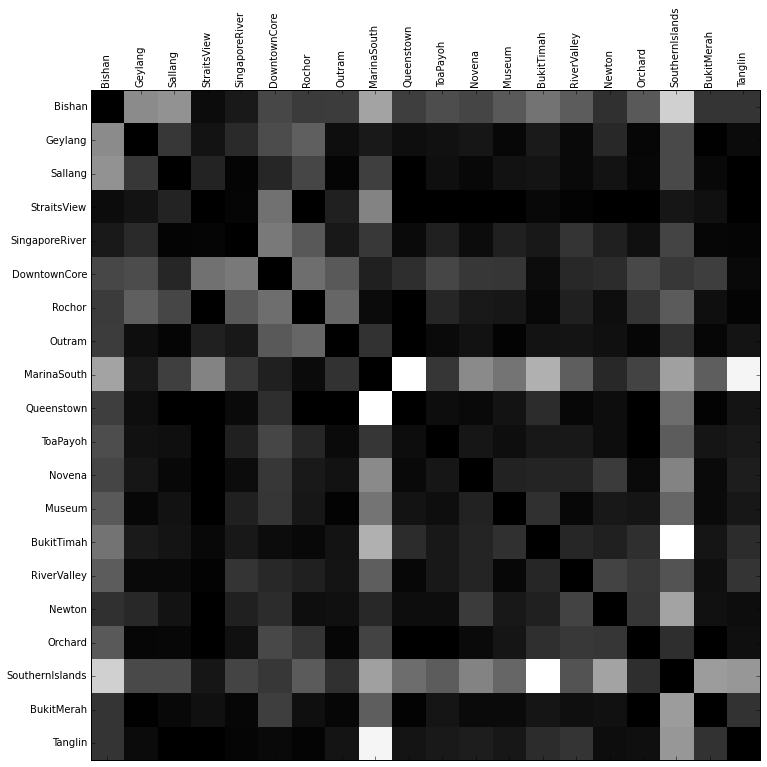

In [74]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
im = ax.matshow(reorderd_confuse_matrix, cmap='gray')
#fig.colorbar(im)

# Shift ticks to be at 0.5, 1.5, etc
#for axis in [ax.xaxis, ax.yaxis]:
ax.yaxis.set(ticks=np.arange(0, len(reorderd_cats)), ticklabels=reorderd_cats)
ax.xaxis.set(ticks=np.arange(0, len(reorderd_cats)), ticklabels=reorderd_cats)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)

plt.show()

### below are trials

In [133]:
spectral = cluster.SpectralClustering(n_clusters=2,
                                      eigen_solver='lobpcg',
                                      affinity="precomputed")

In [134]:
n_samples = 50
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

In [135]:
X, y = noisy_moons
X,y

(array([[ 0.58148611,  0.76254981],
        [ 1.95243209,  0.51519132],
        [ 0.21855416, -0.23125171],
        [ 1.95520899,  0.06916467],
        [ 0.29348265, -0.25943801],
        [ 0.05041012,  0.59029425],
        [ 0.03108532,  0.24142774],
        [ 0.07283069,  1.02615099],
        [-0.98508263,  0.08231534],
        [ 0.1262368 ,  0.99307559],
        [ 1.51245643, -0.36774293],
        [-0.1598357 ,  0.95682439],
        [-0.39608513,  0.99045147],
        [ 1.36649186, -0.3750856 ],
        [ 0.07244064,  0.06818639],
        [ 0.25420156,  1.02450566],
        [ 1.08822287,  0.19083778],
        [-1.00718102,  0.2601441 ],
        [-0.710594  ,  0.6002055 ],
        [-0.89249045,  0.3427353 ],
        [ 1.03266347,  0.22404364],
        [ 1.10917276, -0.51621262],
        [ 1.81352631,  0.04587511],
        [ 0.80515528, -0.48964824],
        [ 0.46550891, -0.28447265],
        [ 0.84152508,  0.6333977 ],
        [ 0.94315288,  0.29457502],
        [ 0.47517569,  0.843

In [136]:
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html
# A is the matrix
connectivity.A

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.5,  0. ],
       ..., 
       [ 0. ,  0.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

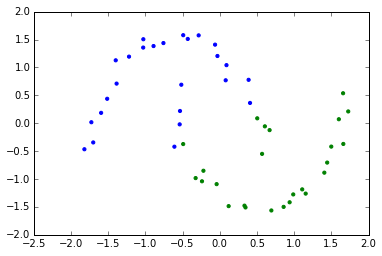

In [137]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

# predict cluster memberships
y_pred = spectral.fit_predict(connectivity)
# cls
# plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
